## Загрузка и изучение данных

In [1]:
!pip install -U scikit-learn -q
!pip install category_encoders -q
!pip install lightgbm -q
!pip install catboost -q
!pip install torch --upgrade -q
!pip install optuna -q

In [2]:
import time
import ast
import hashlib
import warnings
import random

from collections import Counter

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

from sklearn.model_selection import (train_test_split, cross_val_score,
                                     StratifiedKFold)


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer



from sklearn.preprocessing import (OneHotEncoder, StandardScaler,
                                   MinMaxScaler, RobustScaler)
from category_encoders import TargetEncoder



from imblearn.over_sampling import SMOTE



from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


import lightgbm as lgb
from catboost import CatBoostClassifier


from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, roc_auc_score, f1_score,
                             average_precision_score)


from sklearn.dummy import DummyClassifier


import phik
from phik.report import plot_correlation_matrix



import optuna
from optuna.distributions import (CategoricalDistribution, FloatDistribution,
                                  IntDistribution)


import shap

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

RANDOM_STATE = 42
random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

optuna.logging.set_verbosity(optuna.logging.WARNING)

warnings.filterwarnings('ignore')

In [4]:
def display_dataset_info(data):

    print("Первые пять строк датасета:")
    display(data.head())
    print("\n")
    
    print("Размер датасета:")
    print(f"Количество строк: {data.shape[0]}, Количество столбцов: {data.shape[1]}")
    print("\n")
    

    print("Информация о датасете:")
    data.info()
    print("\n")
    
    print("Количество пропущенных значений по столбцам:")
    print(data.isnull().sum())
    print("\n")
    
    print("Дубликаты:") 
    print(data.duplicated().sum())
    print("\n")

In [5]:
try:
    apparel_purchases = pd.read_csv('/datasets/apparel-purchases.csv')
except:
    apparel_purchases = pd.read_csv('apparel-purchases.csv')

display_dataset_info(apparel_purchases)

Первые пять строк датасета:


,client_id,quantity,price,category_ids,date,message_id
0,1515915625468169594,1,1999.0,"['4', '28', '57', '431']",2022-05-16,1515915625468169594-4301-627b661e9736d
1,1515915625468169594,1,2499.0,"['4', '28', '57', '431']",2022-05-16,1515915625468169594-4301-627b661e9736d
2,1515915625471138230,1,6499.0,"['4', '28', '57', '431']",2022-05-16,1515915625471138230-4437-6282242f27843
3,1515915625471138230,1,4999.0,"['4', '28', '244', '432']",2022-05-16,1515915625471138230-4437-6282242f27843
4,1515915625471138230,1,4999.0,"['4', '28', '49', '413']",2022-05-16,1515915625471138230-4437-6282242f27843




Размер датасета:
Количество строк: 202208, Количество столбцов: 6


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202208 entries, 0 to 202207
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   client_id     202208 non-null  int64  
 1   quantity      202208 non-null  int64  
 2   price         202208 non-null  float64
 3   category_ids  202208 non-null  object 
 4   date          202208 non-null  object 
 5   message_id    202208 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 9.3+ MB


Количество пропущенных значений по столбцам:
client_id       0
quantity        0
price           0
category_ids    0
date            0
message_id      0
dtype: int64


Дубликаты:
73020




In [6]:
try:
    apparel_messages = pd.read_csv('/datasets/apparel-messages.csv')
except:
    apparel_messages = pd.read_csv('apparel-messages.csv')

display_dataset_info(apparel_messages)

Первые пять строк датасета:


,bulk_campaign_id,client_id,message_id,event,channel,date,created_at
0,4439,1515915625626736623,1515915625626736623-4439-6283415ac07ea,open,email,2022-05-19,2022-05-19 00:14:20
1,4439,1515915625490086521,1515915625490086521-4439-62834150016dd,open,email,2022-05-19,2022-05-19 00:39:34
2,4439,1515915625553578558,1515915625553578558-4439-6283415b36b4f,open,email,2022-05-19,2022-05-19 00:51:49
3,4439,1515915625553578558,1515915625553578558-4439-6283415b36b4f,click,email,2022-05-19,2022-05-19 00:52:20
4,4439,1515915625471518311,1515915625471518311-4439-628341570c133,open,email,2022-05-19,2022-05-19 00:56:52




Размер датасета:
Количество строк: 12739798, Количество столбцов: 7


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12739798 entries, 0 to 12739797
Data columns (total 7 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   bulk_campaign_id  int64 
 1   client_id         int64 
 2   message_id        object
 3   event             object
 4   channel           object
 5   date              object
 6   created_at        object
dtypes: int64(2), object(5)
memory usage: 680.4+ MB


Количество пропущенных значений по столбцам:
bulk_campaign_id    0
client_id           0
message_id          0
event               0
channel             0
date                0
created_at          0
dtype: int64


Дубликаты:
48610




In [7]:
try:
    target = pd.read_csv('/datasets/apparel-target_binary.csv')
except:
    target = pd.read_csv('apparel-target_binary.csv')
display_dataset_info(target)  

Первые пять строк датасета:


,client_id,target
0,1515915625468060902,0
1,1515915625468061003,1
2,1515915625468061099,0
3,1515915625468061100,0
4,1515915625468061170,0




Размер датасета:
Количество строк: 49849, Количество столбцов: 2


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49849 entries, 0 to 49848
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   client_id  49849 non-null  int64
 1   target     49849 non-null  int64
dtypes: int64(2)
memory usage: 779.0 KB


Количество пропущенных значений по столбцам:
client_id    0
target       0
dtype: int64


Дубликаты:
0




In [8]:
apparel_purchases.describe(include='all')

,client_id,quantity,price,category_ids,date,message_id
count,2.022080e+05,202208.000000,202208.000000,202208,202208,202208
unique,NaN,NaN,NaN,933,642,50204
top,NaN,NaN,NaN,"['4', '28', '57', '431']",2022-11-11,1515915625489095763-6251-6311b13a4cf78
freq,NaN,NaN,NaN,8626,5270,365
mean,1.515916e+18,1.006483,1193.301516,NaN,NaN,NaN
std,1.459514e+08,0.184384,1342.252664,NaN,NaN,NaN
min,1.515916e+18,1.000000,1.000000,NaN,NaN,NaN
25%,1.515916e+18,1.000000,352.000000,NaN,NaN,NaN
50%,1.515916e+18,1.000000,987.000000,NaN,NaN,NaN
75%,1.515916e+18,1.000000,1699.000000,NaN,NaN,NaN


In [9]:
apparel_messages.describe(include='all')

,bulk_campaign_id,client_id,message_id,event,channel,date,created_at
count,1.273980e+07,1.273980e+07,12739798,12739798,12739798,12739798,12739798
unique,NaN,NaN,9061667,11,2,638,4103539
top,NaN,NaN,1515915625489095763-6251-6311b13a4cf78,send,mobile_push,2023-06-10,2023-12-29 15:20:53
freq,NaN,NaN,1454,9058196,7512156,89661,621
mean,1.160459e+04,1.515916e+18,NaN,NaN,NaN,NaN,NaN
std,3.259211e+03,3.265518e+08,NaN,NaN,NaN,NaN,NaN
min,5.480000e+02,1.515916e+18,NaN,NaN,NaN,NaN,NaN
25%,8.746000e+03,1.515916e+18,NaN,NaN,NaN,NaN,NaN
50%,1.351600e+04,1.515916e+18,NaN,NaN,NaN,NaN,NaN
75%,1.415800e+04,1.515916e+18,NaN,NaN,NaN,NaN,NaN


In [10]:
target.describe(include='all')

,client_id,target
count,4.984900e+04,49849.000000
mean,1.515916e+18,0.019278
std,1.487947e+08,0.137503
min,1.515916e+18,0.000000
25%,1.515916e+18,0.000000
50%,1.515916e+18,0.000000
75%,1.515916e+18,0.000000
max,1.515916e+18,1.000000


#### Промежуточные выводы

Загрузили и первично осмотрели датасеты. 

apparel_purchases
* данные о покупках клиентов по дням и по товарам
* 6 столбцов и 202 208 строк
* явных дубликатов 73020
* пропусков нет
* quantity — количество единиц товара, значения  от 1 до 30, среднее значение 1.006, а медиана — 1
* price — цена. значения от 1 до 85 499, среднее составляет 1193.301, а медиана — 987
* category_ids — идентификаторы категорий, 933 уникальных значения, наиболее часто встречающиеся значение ['4', '28', '57', '431']
* date — дата покупки. 642 уникальных значения, наиболее часто встречающиеся значение 2022-11-11
* message_id — идентификатор сообщения из рассылки, 50 204 уникальных значения


apparel_messages:
* данные о рассылках, которые были отправлены клиентам из таблицы покупок.
* 7 столбцов и 11 840 365 строк
* пропуски в столбцах event, channel, date, created_at - по одному
* явных дубликатов 43095
* message_id — идентификатор сообщения. 8426191 уникальных значений
* event — действие с сообщением, 11 уникальных значений, наиболее часто встречающиеся значение send
* channel — канал рассылки. 2 уникальных значения, наиболее часто встречающиеся значение mobile_push
* date — дата действия. 615 уникальных значений, наиболее часто встречающиеся значение 2023-06-10 
* created_at — точное время создания сообщения. 3877502 уникальных значений, наиболее часто встречающиеся значение 2023-12-29 

target:
* данные о совершении покупок клиентами в целевой период
* 2 столбца и 49 849 строк
* пропусков нет
* явных дубликатов нет
* target — клиент совершил повторную покупку в целевом периоде, значения от 0 до 1

## Предобработка данных

Объединим apparel_purchases, apparel_messages и target
первые два по столбцам client_id и message_id
затем по столбцу client_id

In [11]:
data = apparel_purchases.merge(
    apparel_messages,
    on=['client_id', 'message_id'],
    how='inner',
    suffixes=('_purchase', '_message')
)

data.shape

(805820, 11)

In [12]:
df = data.merge(target, on='client_id', how='inner')
df.shape

(805820, 12)

In [13]:
df.head(10)

,client_id,quantity,price,category_ids,date_purchase,message_id,bulk_campaign_id,event,channel,date_message,created_at,target
0,1515915625490739153,1,1999.0,"['2', '18', '123', '451']",2022-05-16,1515915625490739153-4172-626b943cc789b,4172,open,email,2022-05-27,2022-05-27 07:52:08,0
1,1515915625491869271,2,599.0,"['4', '27', '350', '1392']",2022-05-16,1515915625491869271-2090-61a72488d6a0f,2090,click,email,2023-04-12,2023-04-12 08:25:33,0
2,1515915625491869271,2,599.0,"['4', '27', '350', '1392']",2022-05-16,1515915625491869271-2090-61a72488d6a0f,2090,click,email,2023-04-18,2023-04-18 11:47:45,0
3,1515915625491869271,2,599.0,"['4', '27', '350', '1392']",2022-05-16,1515915625491869271-2090-61a72488d6a0f,2090,click,email,2023-06-13,2023-06-13 11:10:41,0
4,1515915625491869271,2,599.0,"['4', '27', '350', '1392']",2022-05-16,1515915625491869271-2090-61a72488d6a0f,2090,click,email,2023-12-28,2023-12-28 11:25:50,0
5,1515915625491869271,2,599.0,"['4', '27', '350', '1392']",2022-05-16,1515915625491869271-2090-61a72488d6a0f,2090,click,email,2023-04-12,2023-04-12 08:25:33,0
6,1515915625491869271,2,599.0,"['4', '27', '350', '1392']",2022-05-16,1515915625491869271-2090-61a72488d6a0f,2090,click,email,2023-04-18,2023-04-18 11:47:45,0
7,1515915625491869271,2,599.0,"['4', '27', '350', '1392']",2022-05-16,1515915625491869271-2090-61a72488d6a0f,2090,click,email,2023-06-13,2023-06-13 11:10:41,0
8,1515915625491869271,2,599.0,"['4', '27', '350', '1392']",2022-05-16,1515915625491869271-2090-61a72488d6a0f,2090,click,email,2023-12-28,2023-12-28 11:25:50,0
9,1515915625566606509,1,349.0,"['5562', '5634', '5579', '710']",2022-05-16,1515915625566606509-4301-627b66245401d,4301,open,email,2022-06-01,2022-06-01 08:15:21,0


In [14]:
df.dtypes

client_id             int64
quantity              int64
price               float64
category_ids         object
date_purchase        object
message_id           object
bulk_campaign_id      int64
event                object
channel              object
date_message         object
created_at           object
target                int64
dtype: object

In [15]:
df['date_purchase'] = pd.to_datetime(df['date_purchase'],format='%Y-%m-%d')
df['date_message'] = pd.to_datetime(df['date_message'],format='%Y-%m-%d')
df['created_at'] = pd.to_datetime(df['created_at'],format='%Y-%m-%d %H:%M:%S')
df['event'] = df['event'].astype('category')
df['channel'] = df['channel'].astype('category')

In [16]:
df.dtypes

client_id                    int64
quantity                     int64
price                      float64
category_ids                object
date_purchase       datetime64[ns]
message_id                  object
bulk_campaign_id             int64
event                     category
channel                   category
date_message        datetime64[ns]
created_at          datetime64[ns]
target                       int64
dtype: object

In [17]:
df.isnull().sum()

client_id           0
quantity            0
price               0
category_ids        0
date_purchase       0
message_id          0
bulk_campaign_id    0
event               0
channel             0
date_message        0
created_at          0
target              0
dtype: int64

In [18]:
df.duplicated().sum()

303695

Дубликатов много, но это оправдано из-за характера данных, которые мы имеем. Нужно укрупнить категории и хешировать. Будем считать, что категория частая, если попадается болеее 1000 раз

In [19]:
df['category_ids'] = df['category_ids'].apply(ast.literal_eval)

all_categories = [cat for sublist in df['category_ids'] for cat in sublist]
category_counts = Counter(all_categories)

threshold = 1000   
popular_categories = {cat for cat, count in category_counts.items() if count > threshold}
 
def filter_popular_categories(category_list):
    return [cat for cat in category_list if cat in popular_categories]
 
df['category_ids_filtered'] = df['category_ids'].apply(filter_popular_categories)
 
def category_hash(category_list):
    sorted_list = sorted(map(str, category_list)) 
    category_str = '-'.join(sorted_list) 
    hash_value = int(hashlib.md5(category_str.encode()).hexdigest(), 16) % (10**9)  
    return hash_value

df['category_id_hashed_filtered'] = df['category_ids_filtered'].apply(category_hash)
 
df[['category_ids', 'category_ids_filtered', 'category_id_hashed_filtered']].head(10)

,category_ids,category_ids_filtered,category_id_hashed_filtered
0,"[2, 18, 123, 451]","[2, 18, 123, 451]",308518287
1,"[4, 27, 350, 1392]","[4, 27]",404640098
2,"[4, 27, 350, 1392]","[4, 27]",404640098
3,"[4, 27, 350, 1392]","[4, 27]",404640098
4,"[4, 27, 350, 1392]","[4, 27]",404640098
5,"[4, 27, 350, 1392]","[4, 27]",404640098
6,"[4, 27, 350, 1392]","[4, 27]",404640098
7,"[4, 27, 350, 1392]","[4, 27]",404640098
8,"[4, 27, 350, 1392]","[4, 27]",404640098
9,"[5562, 5634, 5579, 710]","[5562, 5634, 5579, 710]",452861388


In [20]:
df = df.drop(['category_ids', 'category_ids_filtered'], axis=1)

In [21]:
df['category_id_hashed_filtered'].nunique()

259

In [22]:
# функция для категориальных столбцов

def categorial_unique(df):

    for column in df.select_dtypes(include=['category']).columns:
        print(f'\nУникальные значения столбца: {column}\n{"-"*50}')
        
        try:
            category_counts = df[column].value_counts()

            category_counts_df = category_counts.reset_index()
            category_counts_df.columns = ['category', 'frequency']

            display(category_counts_df)

        except Exception as e:
            print(f'Ошибка {column}: {e}')

In [23]:
categorial_unique(df)


Уникальные значения столбца: event
--------------------------------------------------


,category,frequency
0,click,269289
1,purchase,257528
2,send,145135
3,open,133166
4,hard_bounce,555
5,unsubscribe,105
6,complain,30
7,subscribe,12



Уникальные значения столбца: channel
--------------------------------------------------


,category,frequency
0,email,560375
1,mobile_push,245445


In [24]:
for column in df:
    print(f'{column}: {df.duplicated(subset=column).sum()}')

client_id: 768275
quantity: 805805
price: 802513
date_purchase: 805180
message_id: 761761
bulk_campaign_id: 804294
event: 805812
channel: 805818
date_message: 805182
created_at: 604852
target: 805818
category_id_hashed_filtered: 805561


Удалим все дубликаты, кроме столбцов, содержащих id


In [25]:
id_cols = list(df.columns)
id_cols.remove('client_id')
id_cols.remove('message_id')
id_cols.remove('bulk_campaign_id')

df = df.drop_duplicates(subset=id_cols).reset_index(drop=True)

In [26]:
df.duplicated().sum()

0

In [27]:
def box_plot(df, t=''):

    numerical_df = df.select_dtypes(include='number')
    df_long = numerical_df.melt(var_name='столбец', value_name='значение')
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=df_long, x='столбец', y='значение')
    
    plt.xlabel('столбец', labelpad=15, fontsize=12)
    plt.ylabel('значение', labelpad=15, fontsize=12)
    
    plt.title(t, pad=10, fontsize=18)
    
    plt.show()

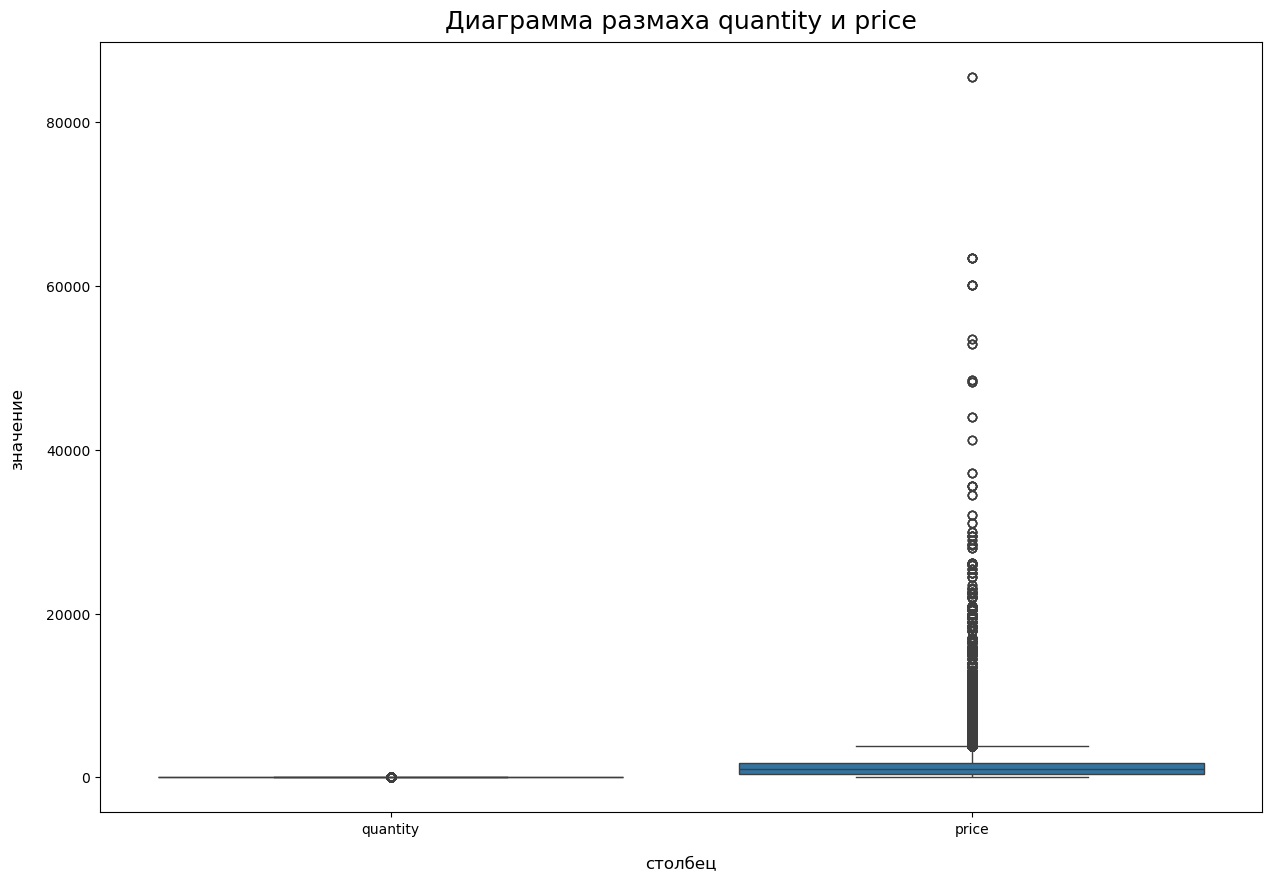

In [28]:
box_plot(
    df[['quantity', 'price']],
    t='Диаграмма размаха quantity и price'
)

In [29]:
df = df[df['price'] < 70000]

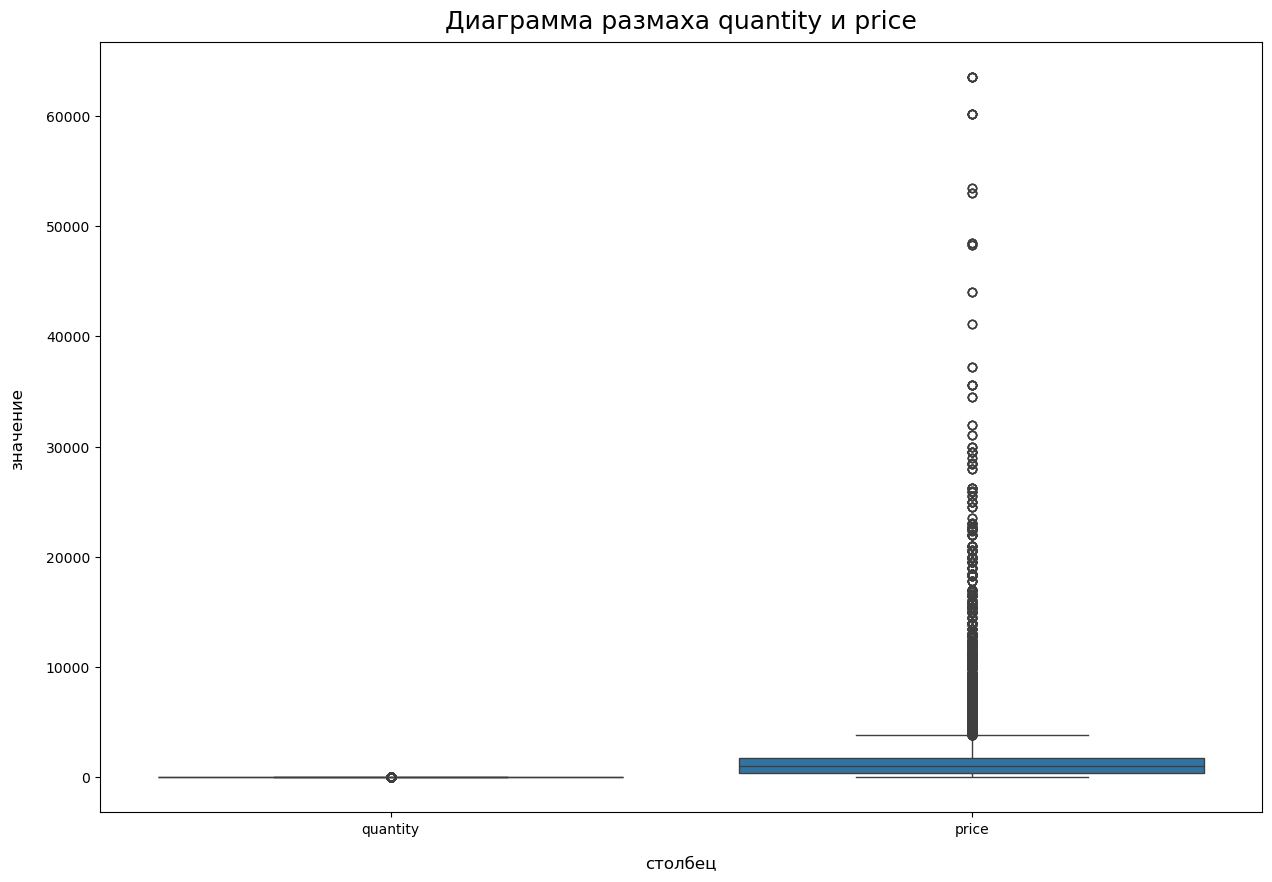

In [30]:
box_plot(
    df[['quantity', 'price']],
    t='Диаграмма размаха quantity и price'
)

#### Промежуточные выводы
* Объединили apparel_purchases, apparel_messages и target первые два по столбцам client_id и message_id затем по столбцу client_id
* в итоговом датафрейме df  для столбцов date_purchase, date_message, created_at поменяли формат в тип даты и времени
* столбцы event и channel были переведены из object в category
* пропусков нет
* Укрупнили категории и провели хеширование. Категория частая, если попадается болеее 1000 раз. Получилось из 933 категорий 248
* Удалили явные дубликаты по всем столбцам, кроме client_id, message_id, bulk_campaign_id.
* Удалили аномальные значения в столбце price (больше 70000)

In [31]:
def date_distributions(df, date_columns):
    for column in date_columns:
        plt.figure(figsize=(7, 4))

    
        sns.histplot(df[column], bins=30, kde=True, color='blue')
        plt.title(f'Распределение дат для {column}')
        plt.xlabel('Дата')
        plt.ylabel('Частота')

        plt.xticks(rotation=45) 
        plt.tight_layout()
        plt.show()

        print(f"Plot {column}")
        print(df[column].describe())
        print("\n")

In [32]:
def plot_overlay_bar_charts(df, categorical_columns):
    for column in categorical_columns:
        plt.figure(figsize=(7, 3))

        sns.countplot(data=df, x=column, hue=column, palette='viridis')
        plt.title(f'Распределение категориальных данных для {column}')
        plt.xlabel(column)
        plt.ylabel('Частота')

        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

          
        print(f"Plot {column}")
        print(df[column].value_counts())
        print("\n")

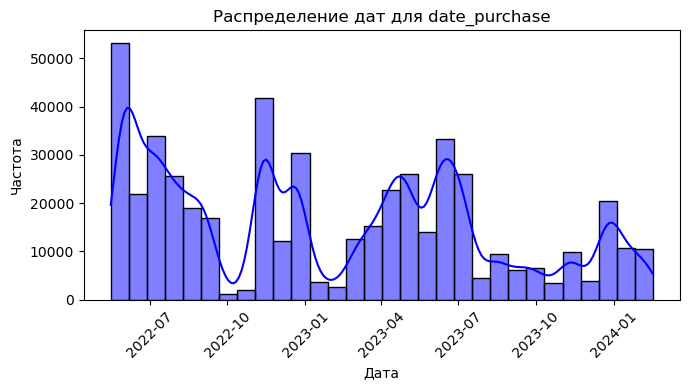

Plot date_purchase
count                           500125
mean     2023-01-29 13:48:25.935116032
min                2022-05-16 00:00:00
25%                2022-08-03 00:00:00
50%                2022-12-24 00:00:00
75%                2023-06-14 00:00:00
max                2024-02-16 00:00:00
Name: date_purchase, dtype: object




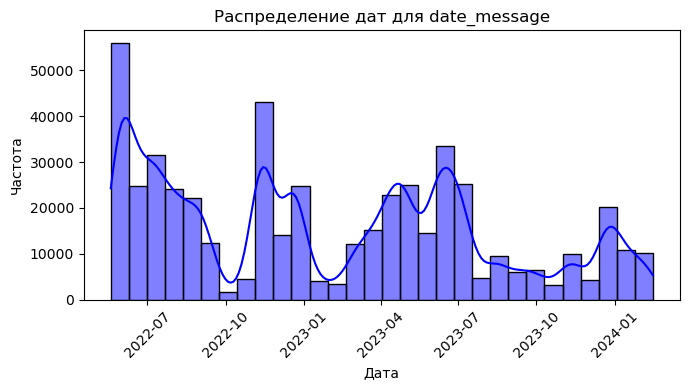

Plot date_message
count                           500125
mean     2023-01-28 19:32:26.227842816
min                2022-05-19 00:00:00
25%                2022-08-03 00:00:00
50%                2022-12-23 00:00:00
75%                2023-06-13 00:00:00
max                2024-02-15 00:00:00
Name: date_message, dtype: object




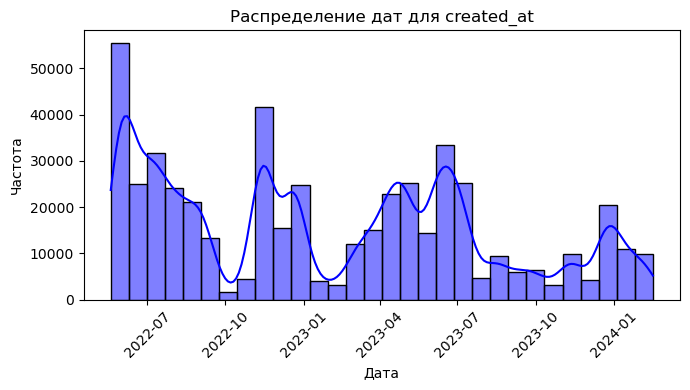

Plot created_at
count                           500125
mean     2023-01-29 07:17:26.059536640
min                2022-05-19 01:50:17
25%                2022-08-03 09:53:50
50%                2022-12-23 14:17:44
75%                2023-06-13 15:03:58
max                2024-02-15 23:51:20
Name: created_at, dtype: object




In [33]:
date_columns =['date_purchase', 'date_message', 'created_at'] 
date_distributions(df, date_columns)

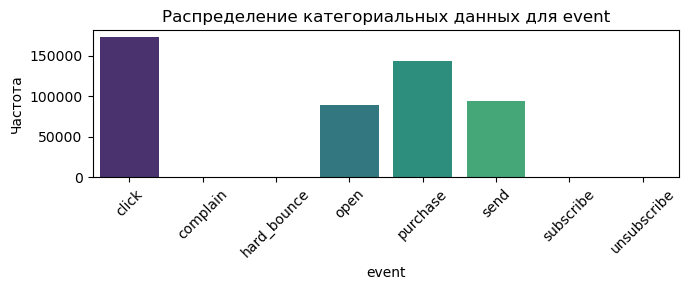

Plot event
event
click          172660
purchase       143284
send            94524
open            89308
hard_bounce       247
unsubscribe        69
complain           26
subscribe           7
Name: count, dtype: int64




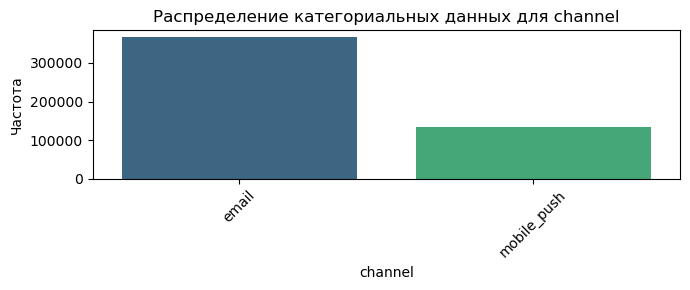

Plot channel
channel
email          366304
mobile_push    133821
Name: count, dtype: int64




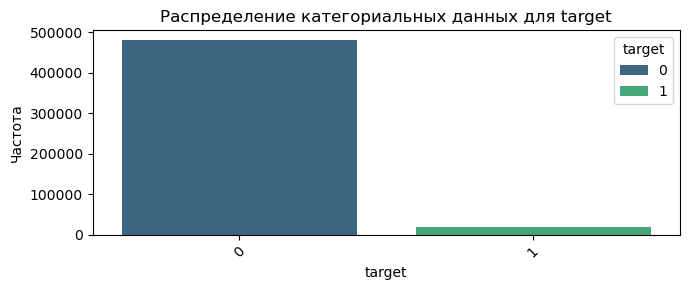

Plot target
target
0    481067
1     19058
Name: count, dtype: int64




In [34]:
cat_columns = ['event', 'channel', 'target']

plot_overlay_bar_charts(df, cat_columns)

#### Промежуточные выводы
* Датасет содержит данные примерно за 2 года начиная с мая 2022.
* сильные спады в продажах в октябре 2022, январе 23. И в целом видим, что динамика продаж за два года идет на спад. Динамику по сезонности не прослеживаю.
* Кол-во сообщений имеет похожий график 
* по столбцу event видим, что больше всего действий сообщениями - клики. На втором месте находится действие purchase-покупка.
* Email рассылок больше, чем push-уведомлений
* В таргете видим большой дисбаланс, некупивших больше чем купивших


## Добавление признаков

Какие признаки попробуем добавить:
* произведение цены товара на количество его единиц
* день недели покупки
* разница во времени между отправкой сообщения и покупкой 
* агрегированные показатели по id: кол-во покупок у одного покупателя, общая сумма покупок у покупателя, дата первой и последней покупки у него
* суммарное количество действий по столбцу event
* кол-во действий по каналам
* конверсия по событиям
* доля сообщений по каналам

In [35]:
df['quantity_price'] = df['quantity'] * df['price']

df['purchase_dayofweek'] = df['date_purchase'].dt.dayofweek

df['message_to_purchase_delay'] = (
    (df['date_purchase'] - df['date_message'])
    .dt.total_seconds() / 3600
)

client_group = df.groupby('client_id').agg(
    total_purchases_per_client=('message_id', 'count'),  
    total_spent_per_client=('quantity_price', 'sum'), 
    last_purchase=('date_purchase', 'max'),
    first_purchase=('date_purchase', 'min'),
 
    total_messages_sent=('event', 'count'),
    total_messages_opened=('event', lambda x: (x == 'open').sum()),
    total_messages_clicked=('event', lambda x: (x == 'click').sum()),
    total_messages_purchased=('event', lambda x: (x == 'purchase').sum()),

    
    total_email_messages=('channel', lambda x: (x == 'email').sum()),
    total_mobile_push_messages=('channel', lambda x: (x == 'mobile_push').sum()),
).reset_index()


client_group['open_rate'] = client_group['total_messages_opened'] / client_group['total_messages_sent']
client_group['click_rate'] = client_group['total_messages_clicked'] / client_group['total_messages_sent']
client_group['purchase_rate'] = client_group['total_messages_purchased'] / client_group['total_messages_sent']

client_group['email_share'] = client_group['total_email_messages'] / client_group['total_messages_sent']
client_group['push_share'] = client_group['total_mobile_push_messages'] / client_group['total_messages_sent']

df = df.merge(client_group, on='client_id', how='left')
df.head(10)

,client_id,quantity,price,date_purchase,message_id,bulk_campaign_id,event,channel,date_message,created_at,target,category_id_hashed_filtered,quantity_price,purchase_dayofweek,message_to_purchase_delay,total_purchases_per_client,total_spent_per_client,last_purchase,first_purchase,total_messages_sent,total_messages_opened,total_messages_clicked,total_messages_purchased,total_email_messages,total_mobile_push_messages,open_rate,click_rate,purchase_rate,email_share,push_share
0,1515915625490739153,1,1999.0,2022-05-16,1515915625490739153-4172-626b943cc789b,4172,open,email,2022-05-27,2022-05-27 07:52:08,0,308518287,1999.0,0,-264.0,1,1999.0,2022-05-16,2022-05-16,1,1,0,0,1,0,1.000000,0.000000,0.000000,1.0,0.0
1,1515915625491869271,2,599.0,2022-05-16,1515915625491869271-2090-61a72488d6a0f,2090,click,email,2023-04-12,2023-04-12 08:25:33,0,404640098,1198.0,0,-7944.0,4,4792.0,2022-05-16,2022-05-16,4,0,4,0,4,0,0.000000,1.000000,0.000000,1.0,0.0
2,1515915625491869271,2,599.0,2022-05-16,1515915625491869271-2090-61a72488d6a0f,2090,click,email,2023-04-18,2023-04-18 11:47:45,0,404640098,1198.0,0,-8088.0,4,4792.0,2022-05-16,2022-05-16,4,0,4,0,4,0,0.000000,1.000000,0.000000,1.0,0.0
3,1515915625491869271,2,599.0,2022-05-16,1515915625491869271-2090-61a72488d6a0f,2090,click,email,2023-06-13,2023-06-13 11:10:41,0,404640098,1198.0,0,-9432.0,4,4792.0,2022-05-16,2022-05-16,4,0,4,0,4,0,0.000000,1.000000,0.000000,1.0,0.0
4,1515915625491869271,2,599.0,2022-05-16,1515915625491869271-2090-61a72488d6a0f,2090,click,email,2023-12-28,2023-12-28 11:25:50,0,404640098,1198.0,0,-14184.0,4,4792.0,2022-05-16,2022-05-16,4,0,4,0,4,0,0.000000,1.000000,0.000000,1.0,0.0
5,1515915625566606509,1,349.0,2022-05-16,1515915625566606509-4301-627b66245401d,4301,open,email,2022-06-01,2022-06-01 08:15:21,0,452861388,349.0,0,-384.0,4,2046.0,2022-05-16,2022-05-16,4,4,0,0,4,0,1.000000,0.000000,0.000000,1.0,0.0
6,1515915625566606509,1,299.0,2022-05-16,1515915625566606509-4301-627b66245401d,4301,open,email,2022-06-01,2022-06-01 08:15:21,0,452861388,299.0,0,-384.0,4,2046.0,2022-05-16,2022-05-16,4,4,0,0,4,0,1.000000,0.000000,0.000000,1.0,0.0
7,1515915625566606509,1,999.0,2022-05-16,1515915625566606509-4301-627b66245401d,4301,open,email,2022-06-01,2022-06-01 08:15:21,0,119976438,999.0,0,-384.0,4,2046.0,2022-05-16,2022-05-16,4,4,0,0,4,0,1.000000,0.000000,0.000000,1.0,0.0
8,1515915625566606509,1,399.0,2022-05-16,1515915625566606509-4301-627b66245401d,4301,open,email,2022-06-01,2022-06-01 08:15:21,0,974508468,399.0,0,-384.0,4,2046.0,2022-05-16,2022-05-16,4,4,0,0,4,0,1.000000,0.000000,0.000000,1.0,0.0
9,1515915625468094895,1,1299.0,2022-05-17,1515915625468094895-4439-6283413c95e9a,4439,open,email,2022-05-20,2022-05-20 11:43:23,0,960250814,1299.0,1,-72.0,11,10089.0,2022-06-28,2022-05-17,11,4,5,1,11,0,0.363636,0.454545,0.090909,1.0,0.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500125 entries, 0 to 500124
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   client_id                    500125 non-null  int64         
 1   quantity                     500125 non-null  int64         
 2   price                        500125 non-null  float64       
 3   date_purchase                500125 non-null  datetime64[ns]
 4   message_id                   500125 non-null  object        
 5   bulk_campaign_id             500125 non-null  int64         
 6   event                        500125 non-null  category      
 7   channel                      500125 non-null  category      
 8   date_message                 500125 non-null  datetime64[ns]
 9   created_at                   500125 non-null  datetime64[ns]
 10  target                       500125 non-null  int64         
 11  category_id_hashed_filtere

## Корреляция


In [37]:
df['date_purchase'] = pd.to_datetime(df['date_purchase']).astype('int64') // 10**9
df['date_message'] = pd.to_datetime(df['date_message']).astype('int64') // 10**9
df['created_at'] = pd.to_datetime(df['created_at']).astype('int64') // 10**9
df['first_purchase'] = pd.to_datetime(df['first_purchase']).astype('int64') // 10**9
df['last_purchase'] = pd.to_datetime(df['last_purchase']).astype('int64') // 10**9

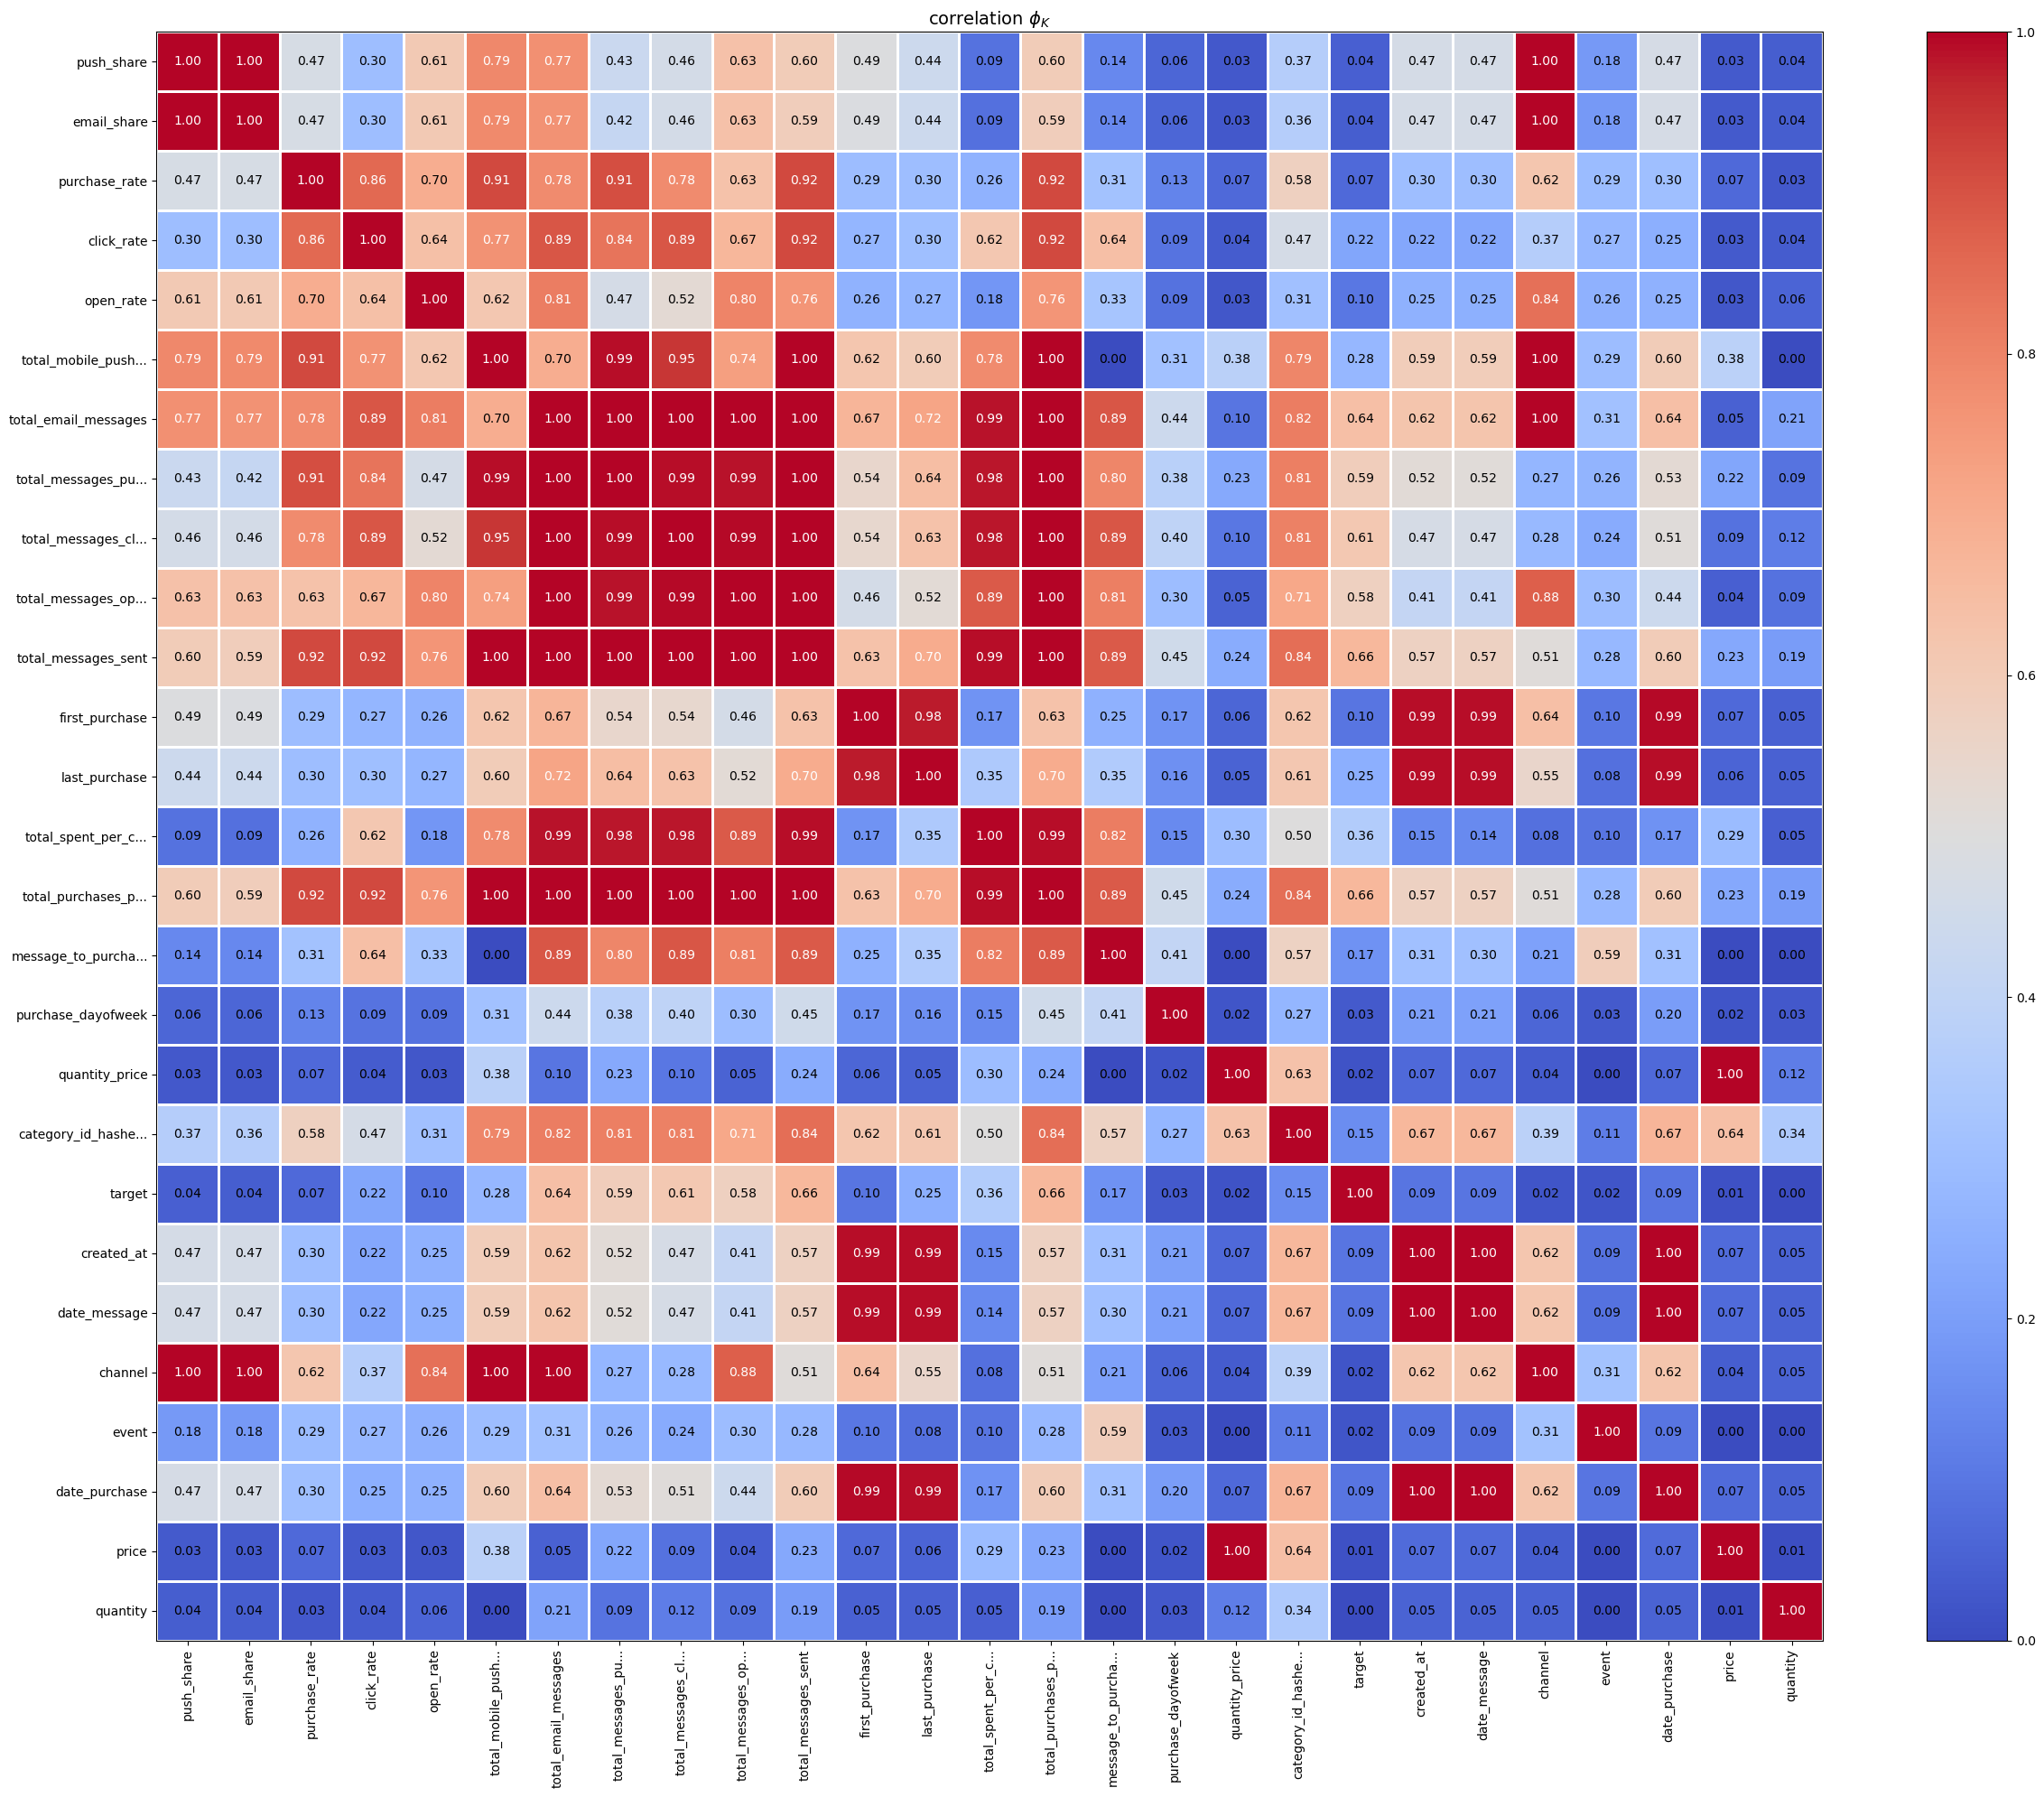

In [38]:
corr_columns = list(df.columns)
corr_columns.remove('client_id')
corr_columns.remove('message_id')
corr_columns.remove('bulk_campaign_id')


in_cols = ['price', 'date_purchase', 'date_message', 'created_at', 'quantity_price',
          'total_spent_per_client', 'avg_spent_per_client', 'last_purchase',
          'first_purchase', 'open_rate', 'click_rate', 'purchase_rate',
          'email_share', 'push_share']


phik_matrix = df[corr_columns].phik_matrix(interval_cols=in_cols)
                                                                      
plot_correlation_matrix(
    phik_matrix.values,
    x_labels=phik_matrix.columns,
    y_labels=phik_matrix.index,
    vmin=0, vmax=1, color_map='coolwarm',
    title=r'correlation $\phi_K$',
    fontsize_factor=1,
    figsize=(25, 20),
)

Отберем входные признаки по критерию связи с целевым признаком

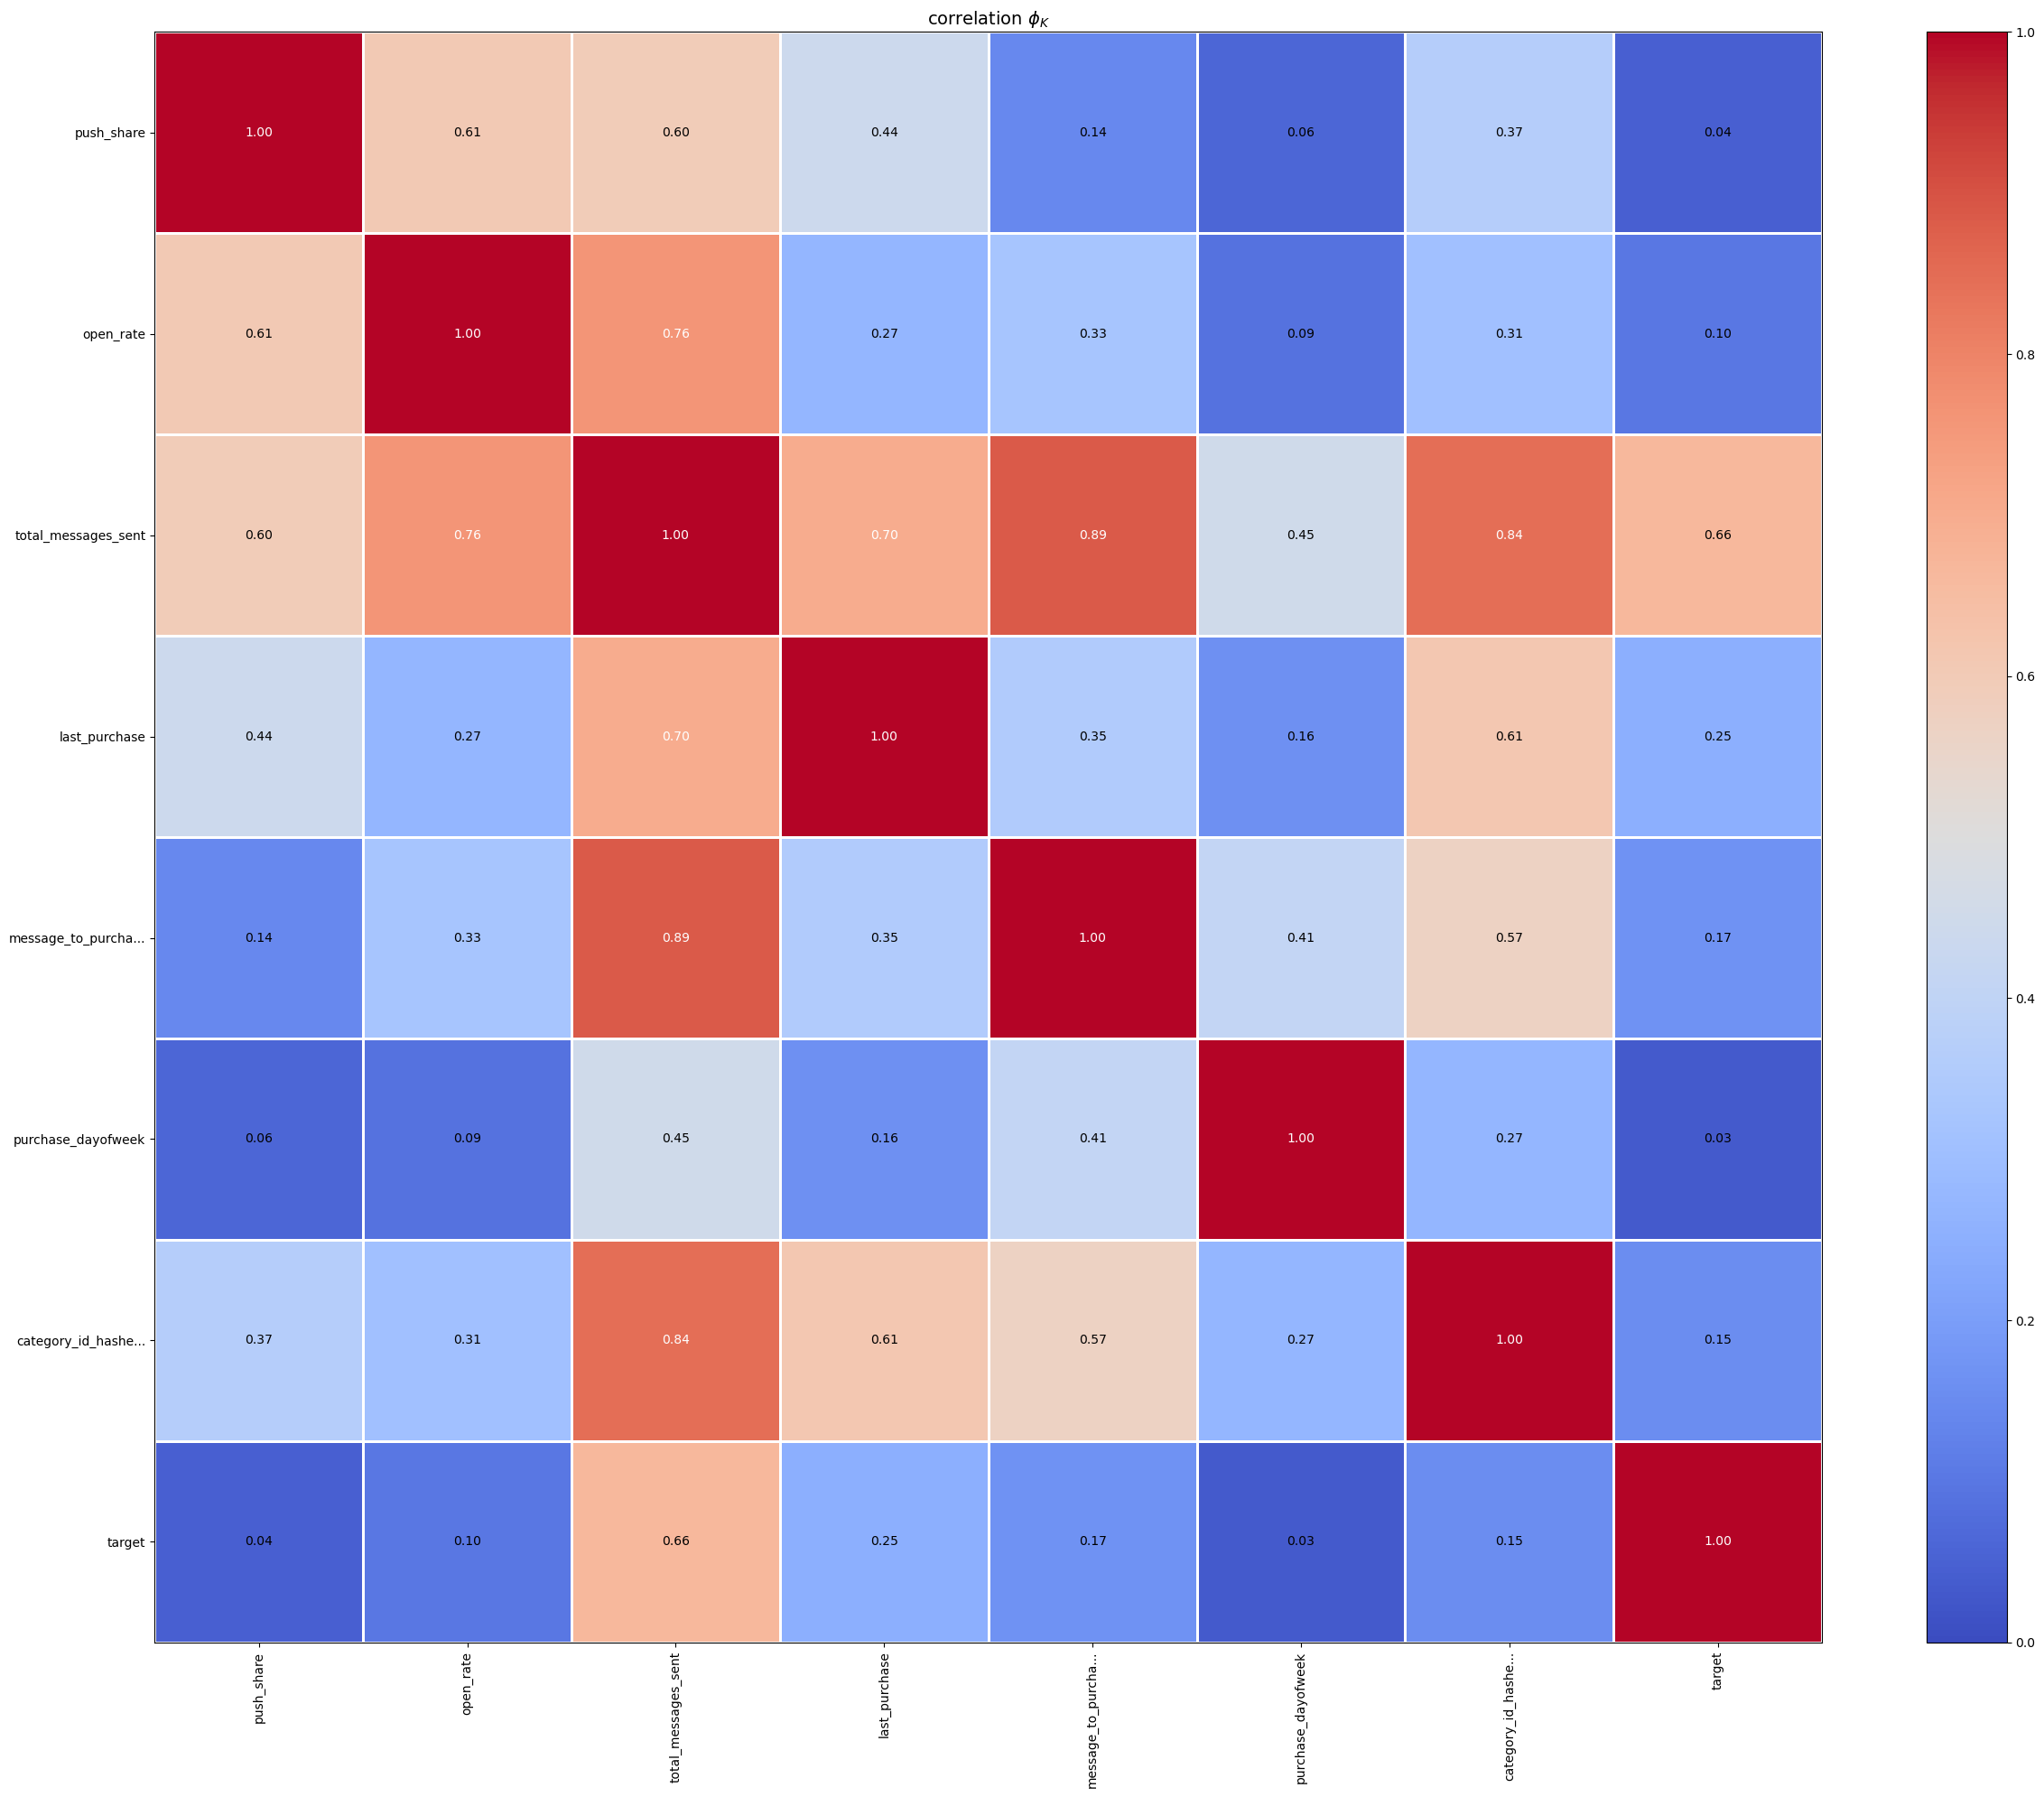

In [39]:
phik_matrix = df[corr_columns].phik_matrix(
    interval_cols=in_cols,
    verbose=False
)

 
target_col = 'target'

 
low_corr_features = set(phik_matrix[target_col][phik_matrix[target_col] < 0.03].index)

 
high_corr_pairs = set()
for col in phik_matrix.columns:
    for row in phik_matrix.index:
        if col != row and phik_matrix.loc[row, col] > 0.9:
            high_corr_pairs.add(tuple(sorted([col, row])))

# отбор признаков из сильно коррелирующих пар
high_corr_features = set()
for feat1, feat2 in high_corr_pairs:
    if feat1 in high_corr_features or feat2 in high_corr_features:
        continue
    
    if phik_matrix.loc[feat1, target_col] >= phik_matrix.loc[feat2, target_col]:
        high_corr_features.add(feat2)
    else:
        high_corr_features.add(feat1)


features_to_drop = low_corr_features | high_corr_features


df = df.drop(columns=features_to_drop)
corr_columns = [col for col in corr_columns if col not in features_to_drop]


phik_matrix = df[corr_columns].phik_matrix(interval_cols=in_cols)
plot_correlation_matrix(
    phik_matrix.values,
    x_labels=phik_matrix.columns,
    y_labels=phik_matrix.index,
    vmin=0, vmax=1, color_map='coolwarm',
    title=r'correlation $\phi_K$',
    fontsize_factor=1,
    figsize=(25, 20),
)

#### Промежуточные выводы по корреляции
Проверили корреляцию по phik и оставили только признаки, удовлетворяющие критерии - между входным и целевым признаком $\phi_k \geq 0.03$,
и  между входными признаками $\phi_k \leq 0.9$.

Это оказались признаки push_share -  доля push-уведомлений, open_rate - доля открытых сообщений, total_messages_sent - количество отправленных сообщений, last_purchase - дата последней покупки, message_to_purchase_delay -разница во времени между отправкой сообщения и покупкой, purchase_dayofweek - день недели покупки,  category_id_hashed_filtered - категории

## Создание моделей

In [40]:
cols = ['push_share',
         'open_rate',
         'total_messages_sent',
         'last_purchase',
         'message_to_purchase_delay',
         'purchase_dayofweek',
         'category_id_hashed_filtered',
         'target'
        ]


target_col = 'target'


num_cols = list(df[cols].select_dtypes(include=[np.number]))
num_cols.remove(target_col)


cat_cols = list(df[cols].select_dtypes(include=['category', 'object']))


In [41]:
X_train, X_temp, y_train, y_temp = train_test_split(
    df[num_cols + cat_cols],
    df[target_col], 
    test_size=0.25,
    stratify=df[target_col],
    random_state=RANDOM_STATE
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp, 
    test_size=0.5,
    stratify=y_temp,
    random_state=RANDOM_STATE
)


In [42]:
sampler = SMOTE(random_state=RANDOM_STATE, k_neighbors=5)

X_train, y_train = sampler.fit_resample(X_train, y_train)

#### Промежуточные выводы

* целевой признак: повторная покупка в целевой период (target)
* признаки: push_share - доля push-уведомлений, open_rate - доля открытых сообщений, total_messages_sent - количество отправленных сообщений, last_purchase - дата последней покупки, message_to_purchase_delay -разница во времени между отправкой сообщения и покупкой, purchase_dayofweek - день недели покупки, category_id_hashed_filtered - категории
* из-за дисбаланса целевого признака сделали оверсэмплинг SMOTE в тренировочной выборке.
* разбили данные на выборки: тренировочную, валидационную и тестовую:

In [43]:
print(f'Размеры тренировочной выборки: входные признаки - {X_train.shape}, целевой признак - {y_train.shape}')
print(f'Размеры валидационной выборки: входные признаки - {X_val.shape}, целевой признак - {y_val.shape}')
print(f'Размеры тестовой выборки: входные признаки - {X_test.shape}, целевой признак - {y_test.shape}')

Размеры тренировочной выборки: входные признаки - (721600, 7), целевой признак - (721600,)
Размеры валидационной выборки: входные признаки - (62516, 7), целевой признак - (62516,)
Размеры тестовой выборки: входные признаки - (62516, 7), целевой признак - (62516,)


## Модели

Используем следующее:
* StandardScaler, MinMaxScaler и RobustScaler для масштабирования
* OneHotEncoder, TargetEncoder для кодирования
* модели простые: knn, decision_tree, random_forest
* градиентный бустинг: lgbm, cat

In [44]:
results_models = {}
gradient_boosting_models = {}

In [45]:
def simple_models(trial):

    start_time = time.time()
    model_name = trial.suggest_categorical(
        'model',
        ['knn', 'decision_tree', 'random_forest']
    )

    scaler_name = trial.suggest_categorical(
        'scaler',
        ['passthrough', 'standard', 'minmax', 'robust']
    )

    encoder_name = trial.suggest_categorical(
        'encoder',
        ['onehot', 'target']
    )

    if scaler_name == 'standard':
        scaler = StandardScaler()
    elif scaler_name == 'minmax':
        scaler = MinMaxScaler()
    elif scaler_name == 'robust':
        scaler = RobustScaler()
    else:
        scaler = 'passthrough'

    if encoder_name == 'onehot':
        encoder = OneHotEncoder(handle_unknown='ignore')
    else:
        encoder = TargetEncoder()
    

    preprocessor = ColumnTransformer([
        ('num', scaler, num_cols),
        ('cat', encoder, cat_cols)
    ])
    

    if model_name == 'knn':
        n_neighbors = trial.suggest_int('n_neighbors', 5, 30) 
        weights = trial.suggest_categorical('weights', ['uniform', 'distance']) 
        model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)


    elif model_name == 'decision_tree':
        max_depth = trial.suggest_int('max_depth', 2, 20) 
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20) 
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10) 
        model = DecisionTreeClassifier(
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=RANDOM_STATE
        )
    
    elif model_name == 'random_forest':
        n_estimators = trial.suggest_int('n_estimators', 50, 500) 
        max_depth = trial.suggest_int('max_depth', 2, 20) 
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20) 
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10) 
        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=RANDOM_STATE,
            n_jobs=-1
        )
    

    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])


    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    score = cross_val_score(pipe, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=1).mean()


    elapsed_time = round(time.time() - start_time, 5)
    

    if model_name not in results_models or score > results_models[model_name]['best_score']:
        results_models[model_name] = {
            'best_params': trial.params,
            'best_score': score,
            'time_taken': elapsed_time,
            'best_model': pipe
        }
    
    return score

In [46]:
def gb_models(trial):


    start_time = time.time()
    

    model_name = trial.suggest_categorical(
        'model',
        ['lgbm', 'cat']
    )
    

    if model_name == 'lgbm':
        params = {
            'objective': 'binary',  
            'num_leaves': trial.suggest_int('num_leaves', 10, 80), 
            'min_child_samples': trial.suggest_int('min_child_samples', 5, 50), 
            'max_depth': trial.suggest_int('max_depth', 3, 10), 
            'n_estimators': trial.suggest_int('n_estimators', 100, 300), 
            'learning_rate': trial.suggest_float('learning_rate', 1e-2, 1e-1, log=True), 
        
           
            'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 1e-1, log=True),
            'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 1e-1, log=True), 
            
           
            'device': 'gpu',
            'gpu_use_dp': False, 
            
           
            'verbose': -1,
            'verbosity': -1,
            
        
            'random_state': RANDOM_STATE
        }
        model = lgb.LGBMClassifier(**params)

 
    if model_name == 'cat':
        params = {
            'depth': trial.suggest_int('depth', 3, 10), 
            'iterations': trial.suggest_int('iterations', 100, 300), 
            'learning_rate': trial.suggest_float('learning_rate', 1e-2, 1e-1, log=True), 
        
            
            'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-2, 1e-1, log=True), 
            
           
            'bootstrap_type': 'Bernoulli', 
            'subsample': trial.suggest_float('subsample', 0.5, 0.9), 
            'border_count': trial.suggest_int('border_count', 32, 128), 
            'grow_policy': 'Lossguide', 
            'early_stopping_rounds': 50, 
            
            
            'task_type': 'GPU',
            
            
            'verbose': 0,
            
            
            'random_seed': RANDOM_STATE
        }
        model = CatBoostClassifier(**params)
        
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    score = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=1).mean()

    
    elapsed_time = round(time.time() - start_time, 5)

    
    if model_name not in gradient_boosting_models or score > gradient_boosting_models[model_name]['best_score']:
        gradient_boosting_models[model_name] = {
            'best_params': trial.params,
            'best_score': score,
            'time_taken': elapsed_time,
            'best_model': model
        }
    
    return score

In [47]:
def train_val_best_model(model, X_tr, y_tr, X_va, y_va):

 
    strart_train_time = time.time()
    model.fit(X_tr, y_tr)
    train_time = round(time.time() - strart_train_time, 5)
    
 
    strart_pred_time = time.time()
    y_pred = model.predict(X_va)
    pred_speed = round(len(X_va) / (time.time() - strart_pred_time), 5)
    
 
    y_pred_proba = model.predict_proba(X_va)[:,1]
    
 
    roc_auc = round(roc_auc_score(y_va, y_pred_proba), 5)
    
 
    print(f'ROC-AUC на валидации: {roc_auc}')
    print(f'Время обучения: {train_time} сек.')
    print(f'Скорость предсказания: {pred_speed} предск./сек.')

 
    return model, y_pred, y_pred_proba

## Обучение

#### Простые модели

In [48]:

study_sm = optuna.create_study(
    direction='maximize',
    sampler=optuna.samplers.TPESampler(seed=RANDOM_STATE)
)
study_sm.optimize(simple_models, n_trials=50)

print('РЕЗУЛЬТАТЫ ПО МОДЕЛЯМ:')
for model, info in results_models.items():
    print(f'\n{model}')
    print(f'Лучшая метрика (ROC-AUC): {info["best_score"]:.4f}')
    print(f'Лучшие гиперпараметры: {info["best_params"]}')
    print(f'Время выполнения: {info["time_taken"]} сек.')

РЕЗУЛЬТАТЫ ПО МОДЕЛЯМ:

decision_tree
Лучшая метрика (ROC-AUC): 0.9952
Лучшие гиперпараметры: {'model': 'decision_tree', 'scaler': 'robust', 'encoder': 'onehot', 'max_depth': 20, 'min_samples_split': 20, 'min_samples_leaf': 9}
Время выполнения: 6.71053 сек.

knn
Лучшая метрика (ROC-AUC): 0.9994
Лучшие гиперпараметры: {'model': 'knn', 'scaler': 'minmax', 'encoder': 'target', 'n_neighbors': 29, 'weights': 'distance'}
Время выполнения: 31.99281 сек.

random_forest
Лучшая метрика (ROC-AUC): 0.9744
Лучшие гиперпараметры: {'model': 'random_forest', 'scaler': 'robust', 'encoder': 'target', 'n_estimators': 247, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 3}
Время выполнения: 50.68635 сек.


In [49]:
 
best_model_sm_name = max(results_models, key=lambda k: results_models[k]['best_score'])
best_sm = results_models[best_model_sm_name]['best_model']
 
best_sm, y_pred_val_sm, y_pred_val_sm_proba = train_val_best_model(
    model=best_sm,
    X_tr=X_train,
    y_tr=y_train,
    X_va=X_val,
    y_va=y_val
)

ROC-AUC на валидации: 0.99633
Время обучения: 0.82652 сек.
Скорость предсказания: 18678.27583 предск./сек.


#### Градиентный бустинг

In [51]:
study_gb = optuna.create_study(
    direction='maximize',
    sampler=optuna.samplers.TPESampler(seed=RANDOM_STATE)
)
study_gb.optimize(gb_models, n_trials=50)

 
print('РЕЗУЛЬТАТЫ ПО МОДЕЛЯМ:')
for model, info in gradient_boosting_models.items():
    print(f'\n{model}')
    print(f'Лучшая метрика (ROC-AUC): {info["best_score"]:.4f}')
    print(f'Лучшие гиперпараметры: {info["best_params"]}')
    print(f'Время выполнения: {info["time_taken"]} сек.')

РЕЗУЛЬТАТЫ ПО МОДЕЛЯМ:

cat
Лучшая метрика (ROC-AUC): 0.9727
Лучшие гиперпараметры: {'model': 'cat', 'depth': 5, 'iterations': 244, 'learning_rate': 0.06664225454669503, 'l2_leaf_reg': 0.09968755229403932, 'subsample': 0.8057079112009599, 'border_count': 100}
Время выполнения: 11.8599 сек.

lgbm
Лучшая метрика (ROC-AUC): 0.9981
Лучшие гиперпараметры: {'model': 'lgbm', 'num_leaves': 80, 'min_child_samples': 45, 'max_depth': 10, 'n_estimators': 294, 'learning_rate': 0.09900019578573517, 'reg_alpha': 0.08576989810578213, 'reg_lambda': 0.0012330960075245306}
Время выполнения: 19.78075 сек.


In [52]:
best_model_gb_name = max(gradient_boosting_models, key=lambda k: gradient_boosting_models[k]['best_score'])
best_gb = gradient_boosting_models[best_model_gb_name]['best_model']


best_gb, y_pred_val_gb, y_pred_val_gb_proba = train_val_best_model(
    model=best_gb,
    X_tr=X_train,
    y_tr=y_train,
    X_va=X_val,
    y_va=y_val
)

ROC-AUC на валидации: 0.98642
Время обучения: 4.19219 сек.
Скорость предсказания: 805133.68849 предск./сек.


#### Промежуточный вывод

Мы получили следующие результаты по работе моделей:
decision_tree
Лучшая метрика (ROC-AUC): 0.9959}
Время выполнения: 6.71053 сек.

knn
Лучшая метрика (ROC-AUC): tance'}
Время выполнения: 31.99281 сек.

random_forest
Лучшая метрика (ROC-Aes_leaf': 3}
Время выполнения: 

cat
Лучшая метрика (ROC-AUC): 0.9720}
Время выполнения: 11.8599 сек.

lgbm
Лучшая метрика (ROC-AUC): 245306}
Время выполнения: 19.780

По метрике ROC-AUC лучшей моделью можно назвать модель KNN, но в совокупности с временем выполнения оптимально использовать и decision_tree, отрыв по метрике небольшой, а время значительно меньше.
75 сек.50.68635 сек.


Уточним еще важность признаков

Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/500 [00:00<?, ?it/s]

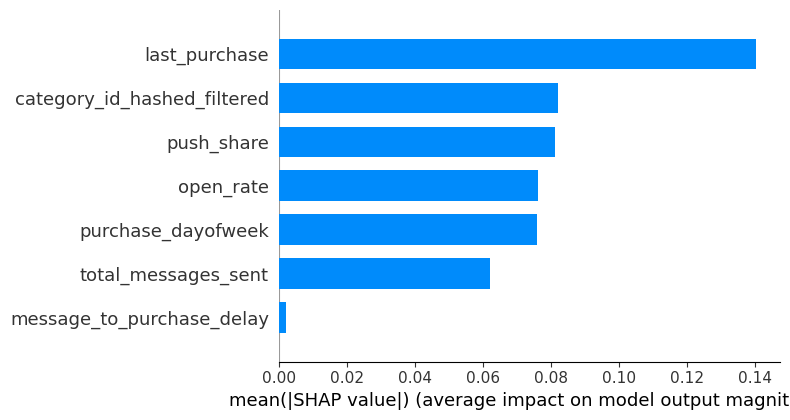

In [53]:
X_train_sample = shap.sample(X_train, 500)
X_val_sample = shap.sample(X_val, 500)

 
feature_names = X_train.columns.tolist()
explainer = shap.KernelExplainer(lambda x: best_sm.predict(pd.DataFrame(x, columns=feature_names)), X_train_sample)

 
shap_values = explainer.shap_values(X_val_sample)

shap.summary_plot(shap_values, X_val, plot_type='bar')

Наиболее значимым признаком оказалась дата последней покупки

# Выводы

Мы работали с интернет-магазином, который собирает историю покупателей, проводит рассылки предложений и 
планирует будущие продажи.
еЦель: ль
Предсказать вероятность покупки в течение 90 

#### Первично к нам поступили такие данные:

apparel_purchases
* данные о покупках клиентов по дням и по товарам
* 6 столбцов и 202 208 строк
* явных дубликатов 73020
* пропусков нет
* quantity — количество единиц товара, значения  от 1 до 30, среднее значение 1.006, а медиана — 1
* price — цена. значения от 1 до 85 499, среднее составляет 1193.301, а медиана — 987
* category_ids — идентификаторы категорий, 933 уникальных значения, наиболее часто встречающиеся значение ['4', '28', '57', '431']
* date — дата покупки. 642 уникальных значения, наиболее часто встречающиеся значение 2022-11-11
* message_id — идентификатор сообщения из рассылки, 50 204 уникальных значения


apparel_messages:
* данные о рассылках, которые были отправлены клиентам из таблицы покупок.
* 7 столбцов и 11 840 365 строк
* пропуски в столбцах event, channel, date, created_at - по одному
* явных дубликатов 43095
* message_id — идентификатор сообщения. 8426191 уникальных значений
* event — действие с сообщением, 11 уникальных значений, наиболее часто встречающиеся значение send
* channel — канал рассылки. 2 уникальных значения, наиболее часто встречающиеся значение mobile_push
* date — дата действия. 615 уникальных значений, наиболее часто встречающиеся значение 2023-06-10 
* created_at — точное время создания сообщения. 3877502 уникальных значений, наиболее часто встречающиеся значение 2023-12-29 

target:
* данные о совершении покупок клиентами в целевой период
* 2 столбца и 49 849 строк
* пропусков нет
* явных дубликатов нет
* target — клиент совершил повторную покупку в целевом периоде, значения от 0 до 1д

#### Провели предобработку.
* Объединили apparel_purchases, apparel_messages и target первые два по столбцам client_id и message_id затем по столбцу client_id
* в итоговом датафрейме df  для столбцов date_purchase, date_message, created_at поменяли формат в тип даты и времени
* столбцы event и channel были переведены из object в category
* пропусков нет
* Укрупнили категории и провели хеширование. Категория частая, если попадается болеее 1000 раз. Получилось из 933 категорий 248
* Удалили явные дубликаты по всем столбцам, кроме client_id, message_id, bulk_campaign_id.
* Удалили аномальные значения в столбце price (больше 70000)

#### Далее изучили данные
* Датасет содержит данные примерно за 2 года начиная с мая 2022.
* сильные спады в продажах в октябре 2022, январе 23. И в целом видим, что динамика продаж за два года идет на спад. Динамику по сезонности не прослеживаю.
* Кол-во сообщений имеет похожий график 
* по столбцу event видим, что больше всего действий сообщениями - клики. На втором месте находится действие purchase-покупка.
* Email рассылок больше, чем push-уведомлений
* В таргете видим большой дисбаланс, некупивших больше чем купивших

#### Добавили признаки

* произведение цены товара на количество его единиц
* день недели покупки
* разница во времени между отправкой сообщения и покупкой 
* агрегированные показатели по id: кол-во покупок у одного покупателя, общая сумма покупок у покупателя, дата первой и последней покупки у него
* суммарное количество действий по столбцу event
* кол-во действий по каналам
* конверсия по событиям
* доля сообщений по каналам

#### Провели корреляционный анализ

Проверили корреляцию по phik и оставили только признаки, удовлетворяющие критерии - между входным и целевым признаком $\phi_k \geq 0.03$,
и  между входными признаками $\phi_k \leq 0.9$.

Это оказались признаки push_share -  доля push-уведомлений, open_rate - доля открытых сообщений, total_messages_sent - количество отправленных сообщений, last_purchase - дата последней покупки, message_to_purchase_delay -разница во времени между отправкой сообщения и покупкой, purchase_dayofweek - день недели покупки,  category_id_hashed_filtered - категории

#### Построили и обучили модели

* целевой признак: повторная покупка в целевой период (target)
* признаки: push_share - доля push-уведомлений, open_rate - доля открытых сообщений, total_messages_sent - количество отправленных сообщений, last_purchase - дата последней покупки, message_to_purchase_delay -разница во времени между отправкой сообщения и покупкой, purchase_dayofweek - день недели покупки, category_id_hashed_filtered - категории
* из-за дисбаланса целевого признака сделали оверсэмплинг SMOTE в тренировочной выборке.
* разбили данные на выборки: тренировочную, валидационную и тестовую:
Размеры тренировочной выборки: входные признаки - (721600, 7), целевой признак - (721600,)
Размеры валидационной выборки: входные признаки - (62516, 7), целевой признак - (62516,)
Размеры тестовой выборки: входные признаки - (62516, 7), целевой признак - (62516

Попробовали следующие параметры:
* StandardScaler, MinMaxScaler и RobustScaler для масштабирования
* OneHotEncoder, TargetEncoder для кодирования
* модели простые: knn, decision_tree, random_forest
* градиентный бустинг: lgbm, cat

Мы получили следующие результаты по работе моделей:
decision_tree
Лучшая метрика (ROC-AUC): 0.9952
Время выполнения: 6.71053 сек.

knn
Лучшая метрика (ROC-AUC): 0.9994
Время выполнения: 31.99281 сек.

random_forest
Лучшая метрика (ROC-AUC): 0.9744
Время выполнения: 50.68635 сек.

cat
Лучшая метрика (ROC-AUC): 0.9727
Время выполнения: 11.8599 сек.

lgbm
Лучшая метрика (ROC-AUC): 0.9981
Время выполнения: 19.78075 сек.


По метрике ROC-AUC лучшей моделью можно назвать модель KNN, но в совокупности с временем выполнения оптимально использовать и decision_tree, отрыв по метрике небольшой, а время значительно меньше.
Наиболее значимым признаком оказалась дата последней покупки,)ней
дней